In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [ ]:
# Define tourist locations in Rajasthan and their coordinates (latitude, longitude)
tourist_locations = {
    "Jaipur": (26.9124, 75.7873),
    "Udaipur": (24.5854, 73.7125),
    "Jodhpur": (26.2389, 73.0243),
    "Pushkar": (26.4907, 74.5523),
    "Jaisalmer": (26.9157, 70.9083),
    "Mount Abu": (24.5925, 72.7156),
    "Bikaner": (28.0229, 73.3119),
    "Ajmer": (26.4499, 74.6399),
    "Chittorgarh": (24.8887, 74.6269),
    "Ranthambore": (25.8667, 76.3500),
    "Bundi": (25.4415, 75.6405),
    "Alwar": (27.5704, 76.6095),
    "Sawai Madhopur": (25.9928, 76.3425),
    "Barmer": (25.7500, 71.4167),
    "Bharatpur": (27.2156, 77.4930),
    "Sikar": (27.6121, 75.1399),
    "Tonk": (26.1664, 75.7885),
    "Kota": (25.2138, 75.8648),
    "Dungarpur": (23.8406, 73.7149),
    "Bhilwara": (25.3475, 74.6408)
}

In [ ]:
# Calculate distances between tourist locations
def calc_distance(loc1, loc2):
    lat1, lon1 = tourist_locations[loc1]
    lat2, lon2 = tourist_locations[loc2]
    radius = 6371  # Earth radius in km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(
        dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c
    return distance


In [ ]:
# Generate initial solution (random permutation)
def initial_solution(locations):
    return random.sample(locations, len(locations))


In [ ]:
# Calculate total distance of tour
def total_distance(tour):
    total_dist = 0
    for i in range(len(tour)):
        total_dist += calc_distance(tour[i], tour[(i + 1) % len(tour)])
    return total_dist

In [ ]:
def plot_tour(tour, locations):
    # Extract coordinates of tourist locations in the tour
    tour_coords = [tourist_locations[loc] for loc in tour]

    # Add the starting location at the end to close the loop
    tour_coords.append(tour_coords[0])

    # Unzip the coordinates into separate lists of latitudes and longitudes
    lats, lons = zip(*tour_coords)

    # Plot the tour
    plt.figure(figsize=(10, 6))
    plt.plot(lons, lats, marker='o', linestyle='-', color='b')
    plt.title('Tour Route')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

In [ ]:
# Simulated Annealing algorithm
def simulated_annealing(locations, max_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution(locations)
    best_solution = current_solution
    current_cost = total_distance(current_solution)
    best_cost = current_cost
    temperature = initial_temperature

    for i in range(max_iterations):
        # Generate a neighboring solution by swapping two random locations
        new_solution = current_solution[:]
        a, b = random.sample(range(len(new_solution)), 2)
        new_solution[a], new_solution[b] = new_solution[b], new_solution[a]

        # Calculate the cost of the new solution
        new_cost = total_distance(new_solution)

        # If the new solution is better or accepted based on temperature, update current solution
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temperature):
            current_solution = new_solution
            current_cost = new_cost

        # Update best solution if applicable
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        # Decrease temperature
        temperature *= cooling_rate

    return best_solution, best_cost

Best Tour Route:
Sawai Madhopur -> Ranthambore -> Bhilwara -> Chittorgarh -> Udaipur -> Dungarpur -> Mount Abu -> Jodhpur -> Barmer -> Jaisalmer -> Bikaner -> Sikar -> Jaipur -> Tonk -> Kota -> Bundi -> Ajmer -> Pushkar -> Alwar -> Bharatpur
Total Distance: 2499.36 km


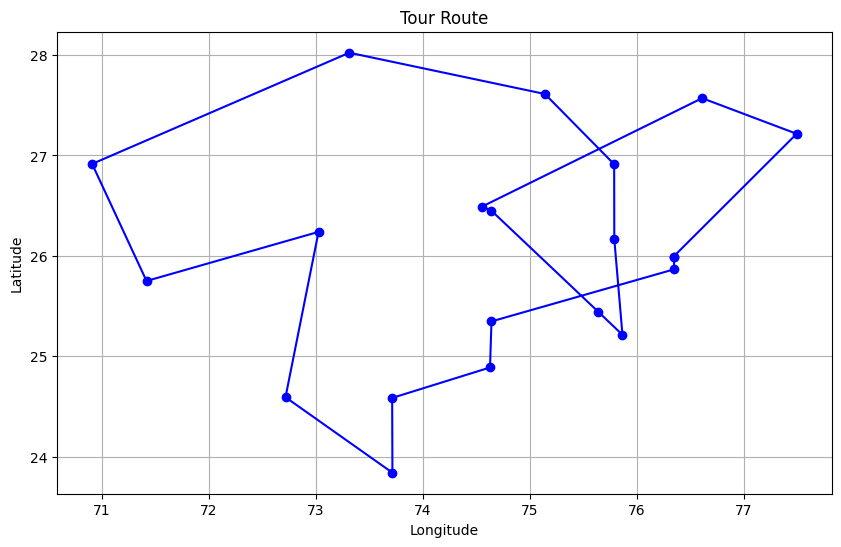

In [ ]:
# Main function
def main():
    locations = list(tourist_locations.keys())
    max_iterations = 10000
    initial_temperature = 100.0
    cooling_rate = 0.6

    best_solution, best_cost = simulated_annealing(locations, max_iterations, initial_temperature, cooling_rate)

    print("Best Tour Route:")
    print(" -> ".join(best_solution))
    print("Total Distance: {:.2f} km".format(best_cost))
    plot_tour(best_solution, tourist_locations)
main()